EDA -> (EXPLORATORY DATA ANALYSIS)

(1) LOAD THE DATASET

In [4]:
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt

# Load the Titanic DataSet
df = sns.load_dataset('titanic')


In [7]:
print(df)
print(df.tail())
print(df.head())

     survived  pclass     sex   age  ...  deck  embark_town  alive  alone
0           0       3    male  22.0  ...   NaN  Southampton     no  False
1           1       1  female  38.0  ...     C    Cherbourg    yes  False
2           1       3  female  26.0  ...   NaN  Southampton    yes   True
3           1       1  female  35.0  ...     C  Southampton    yes  False
4           0       3    male  35.0  ...   NaN  Southampton     no   True
..        ...     ...     ...   ...  ...   ...          ...    ...    ...
886         0       2    male  27.0  ...   NaN  Southampton     no   True
887         1       1  female  19.0  ...     B  Southampton    yes   True
888         0       3  female   NaN  ...   NaN  Southampton     no  False
889         1       1    male  26.0  ...     C    Cherbourg    yes   True
890         0       3    male  32.0  ...   NaN   Queenstown     no   True

[891 rows x 15 columns]
     survived  pclass     sex   age  ...  deck  embark_town  alive  alone
886         0

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   survived     891 non-null    int64   
 1   pclass       891 non-null    int64   
 2   sex          891 non-null    object  
 3   age          714 non-null    float64 
 4   sibsp        891 non-null    int64   
 5   parch        891 non-null    int64   
 6   fare         891 non-null    float64 
 7   embarked     889 non-null    object  
 8   class        891 non-null    category
 9   who          891 non-null    object  
 10  adult_male   891 non-null    bool    
 11  deck         203 non-null    category
 12  embark_town  889 non-null    object  
 13  alive        891 non-null    object  
 14  alone        891 non-null    bool    
dtypes: bool(2), category(2), float64(2), int64(4), object(5)
memory usage: 80.7+ KB


In [9]:
# Drop less useful or high-missing columns
df.drop(columns=['deck','embark_town'],inplace=True)

# Fill missing age with median
df['age'].fillna(df['age'].median(),inplace=True)

# Fill embarked with mode
df['embarked'].fillna(df['embarked'].mode()[0],inplace=True)

# Drop rows with any remaining missing values
df.dropna(inplace=True)

# Confirm cleanup
df.isnull().sum()

/var/folders/mh/zyvgrgvd7hxg_1ds_4_3qklc0000gn/T/ipykernel_7136/2035817125.py:5: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['age'].fillna(df['age'].median(),inplace=True)
/var/folders/mh/zyvgrgvd7hxg_1ds_4_3qklc0000gn/T/ipykernel_7136/2035817125.py:8: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values alway

survived      0
pclass        0
sex           0
age           0
sibsp         0
parch         0
fare          0
embarked      0
class         0
who           0
adult_male    0
alive         0
alone         0
dtype: int64

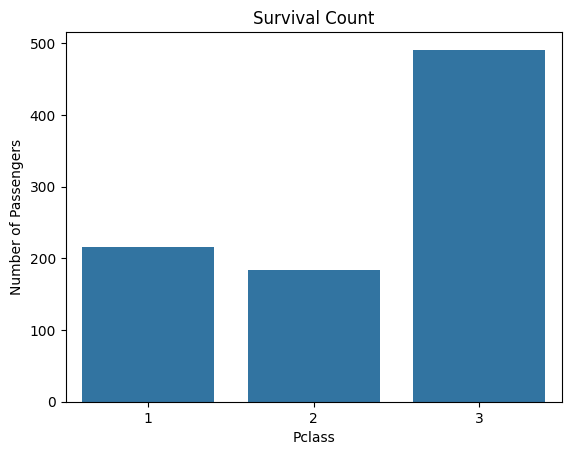

In [10]:
sns.countplot(x='pclass',data=df)
plt.title('Survival Count')
plt.xlabel('Pclass')
plt.ylabel('Number of Passengers')
plt.show()

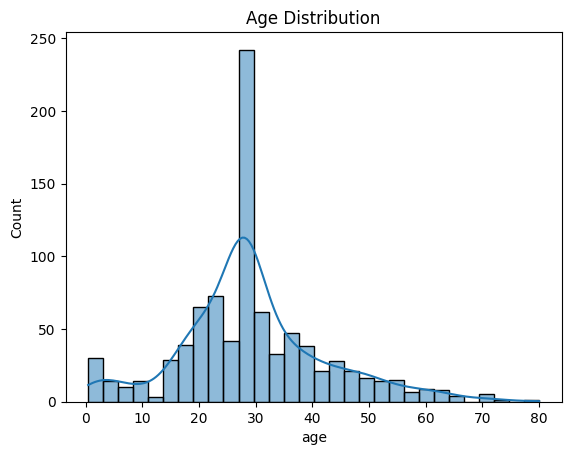

In [11]:
sns.histplot(df['age'],kde=True,bins=30)
plt.title("Age Distribution")
plt.show()

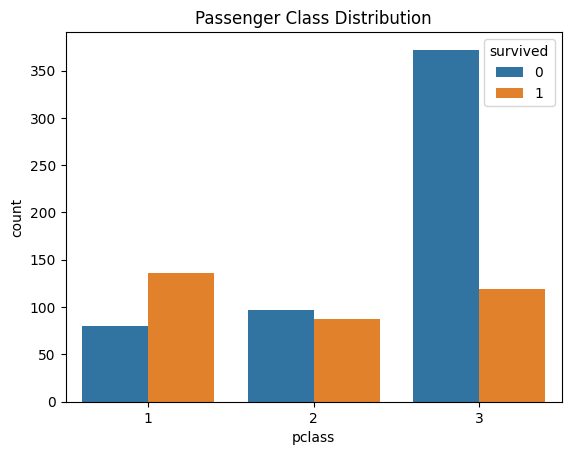

In [12]:
sns.countplot(x='pclass',hue='survived',data=df)
plt.title('Passenger Class Distribution')
plt.show()

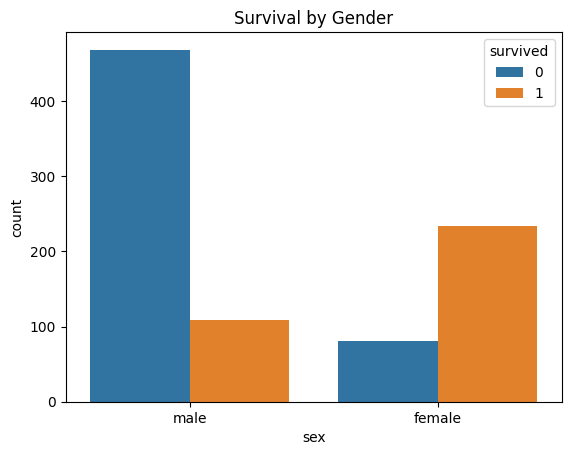

In [13]:
sns.countplot(x='sex',hue='survived',data=df)
plt.title('Survival by Gender')
plt.show()

In [14]:
# Create a new feature: is_child
df['is_child'] = df['age'] < 18

# Create family size
df['family_size'] = df['sibsp'] + df['parch']


In [15]:
df.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,alive,alone,is_child,family_size
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,no,False,False,1
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,yes,False,False,1
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,yes,True,False,0
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,yes,False,False,1
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,no,True,False,0


In [16]:
df.to_csv("titanic_cleaned.csv",index=False)